## Pascal

/opt/anaconda3/envs/owchbuddy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/owchbuddy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


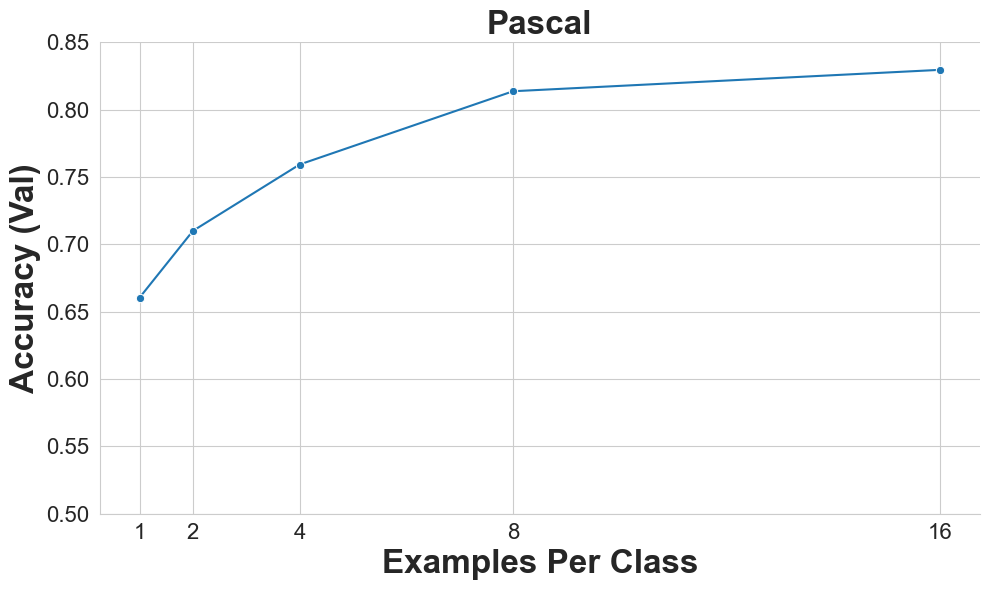

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

def plot_pascal_results(csv_folder, output_filename='pascal_results_plot'):
    # Load all CSV files in the folder
    all_files = glob.glob(os.path.join(csv_folder, "*.csv"))
    
    # Read and concatenate all CSV files
    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Filter data
    filtered_df = combined_df[(combined_df['metric'] == 'Accuracy') & 
                              (combined_df['split'] == 'Validation')]
    
    # Group by examples_per_class and get the max value for each group
    best_results = filtered_df.groupby('examples_per_class')['value'].max().reset_index()
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    
    # Create the line plot
    sns.lineplot(data=best_results, x='examples_per_class', y='value', marker='o')
    
    # Customize the plot
    plt.title('Pascal', fontsize=24, fontweight='bold')
    plt.xlabel('Examples Per Class', fontsize=24, fontweight='bold')
    plt.ylabel('Accuracy (Val)', fontsize=24, fontweight='bold')
    plt.xticks([1, 2, 4, 8, 16], fontsize=16)
    plt.yticks(fontsize=16)
    
    # Set y-axis range
    plt.ylim(0.5, 0.85)
    
    # Remove top and right spines
    sns.despine()
    
    # Save the plot
    plt.tight_layout()
    plt.savefig(f'{output_filename}.png', dpi=300)
    plt.savefig(f'{output_filename}.pdf')
    plt.show()

# Usage example:
plot_pascal_results('/Users/andrew/Thesis/pascal-baselines/textual-inversion-1.0-0.75-0.5-0.25')

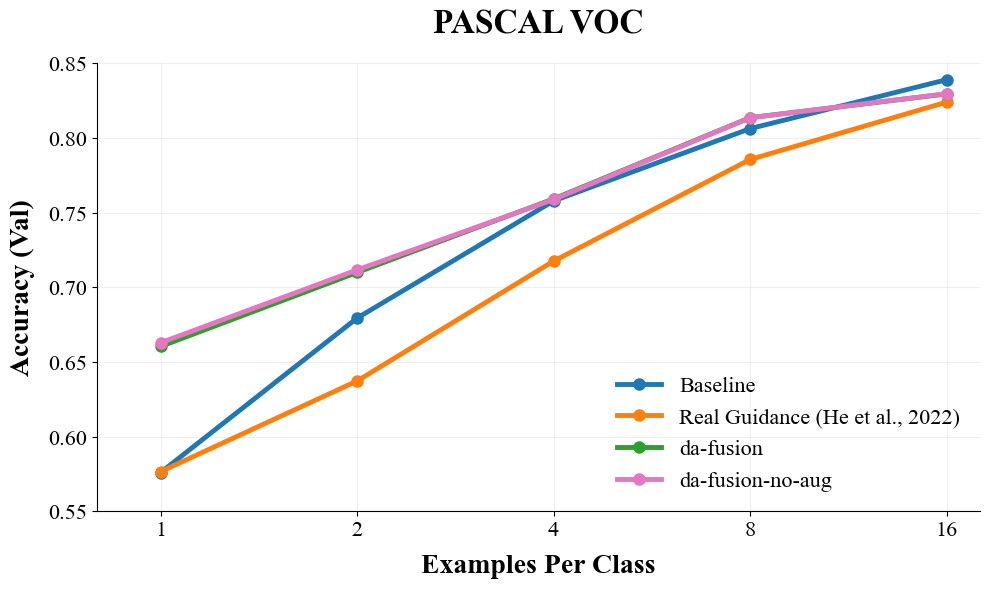

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

# Constants
BASE_FOLDER = '/Users/andrew/Thesis/smart-image-augmentation/results/researchers-results'
METHODS = {
    'pascal-randaugment': 'Baseline',
    'pascal-real-guidance': 'Real Guidance (He et al., 2022)',
    'pascal-da-fusion': 'da-fusion',
    'pascal-da-fusion-no-aug': 'da-fusion-no-aug',
}

def load_and_process_data(folder):
    all_files = glob.glob(os.path.join(folder, "*.csv"))
    if not all_files:
        print(f"No CSV files found in {folder}")
        return None

    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename, index_col=0)
            df_list.append(df)
        except Exception as e:
            print(f"Error reading {filename}: {e}")

    if not df_list:
        print(f"No valid CSV files found in {folder}")
        return None

    combined_df = pd.concat(df_list, ignore_index=True)
    
    filtered_df = combined_df[(combined_df['metric'] == 'Accuracy') & 
                              (combined_df['split'] == 'Validation')]
    
    best_results = filtered_df.groupby('examples_per_class')['value'].max().reset_index()
    
    return best_results

def plot_pascal_results(base_folder, output_filename='pascal_results_plot'):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
    color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']
    
    for i, (folder, method_name) in enumerate(METHODS.items()):
        full_path = os.path.join(base_folder, folder)
        if not os.path.exists(full_path):
            print(f"Folder not found: {full_path}")
            continue
        
        data = load_and_process_data(full_path)
        if data is None:
            continue
        
        plt.plot(data['examples_per_class'], data['value'], marker='o', linewidth=3.5, 
         color=color_palette[i], label=method_name, markersize=8)

    plt.title('PASCAL VOC', fontsize=24, fontweight='bold', y=1.05)
    plt.xlabel('Examples Per Class', fontsize=20, fontweight='bold', labelpad=10)
    plt.ylabel('Accuracy (Val)', fontsize=20, fontweight='bold', labelpad=10)
    plt.xscale('log', base=2)
    plt.xticks([1, 2, 4, 8, 16], ['1', '2', '4', '8', '16'], fontsize=16)
    plt.yticks(np.arange(0.55, 0.86, 0.05), fontsize=16)
    
    plt.ylim(0.55, 0.85)
    plt.xlim(0.8, 18)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.legend(fontsize=16, loc='lower right', frameon=False)
    
    plt.tight_layout()
    plt.savefig(f'{output_filename}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{output_filename}.pdf', bbox_inches='tight')
    plt.show()

# Usage
plot_pascal_results(BASE_FOLDER)

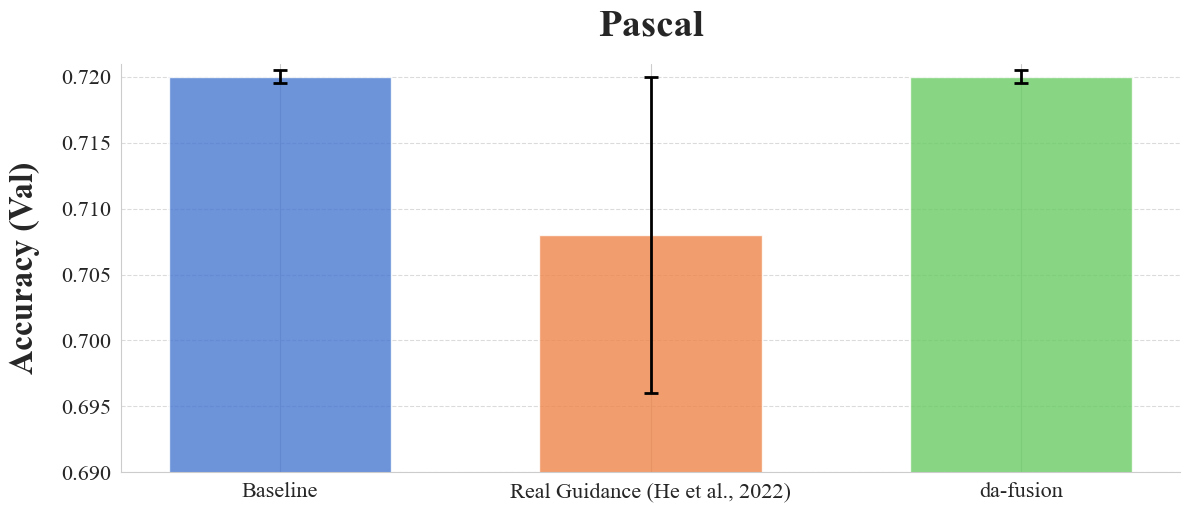

In [28]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

def plot_pascal_bar_results(base_folder, output_filename='pascal_bar_results_plot'):
    plt.figure(figsize=(12, 6))
    plt.rcParams['font.family'] = 'Times New Roman'
    
    color_palette = ['#4878D0', '#EE854A', '#6ACC64']
    
    # Simulated data (replace this with your actual data loading logic)
    methods = ['Baseline', 'Real Guidance (He et al., 2022)', 'da-fusion']
    means = [0.72, 0.708, 0.72]
    errors = [0.0005, 0.012, 0.0005]
    
    x = range(len(methods))
    
    # Create bar plot
    plt.bar(x, means, color=color_palette, alpha=0.8, width=0.6)
    
    # Add error bars
    plt.errorbar(x, means, yerr=errors, fmt='none', color='black', capsize=5, capthick=2, elinewidth=2)
    
    # Customize the plot
    plt.title('Pascal', fontsize=28, fontweight='bold', y=1.05)
    plt.ylabel('Accuracy (Val)', fontsize=24, fontweight='bold', labelpad=15)
    plt.ylim(0.690, 0.721)
    
    plt.xticks(x, methods, fontsize=16, rotation=0, ha='center')
    plt.yticks(np.arange(0.690, 0.721, 0.005), fontsize=16)
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Adjust layout to prevent x-label cutoff
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    
    plt.savefig(f'{output_filename}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{output_filename}.pdf', bbox_inches='tight')
    plt.show()

# Usage
plot_pascal_bar_results(BASE_FOLDER)

In [16]:
!pwd

/Users/andrew/Thesis/smart-image-augmentation


In [17]:
!ls researchers_results/

pascal-da-fusion     pascal-randaugment   pascal-real-guidance


In [18]:
!ls researchers_results/pascal-da-fusion

results_0_1.csv  results_2_1.csv  results_4_1.csv  results_6_1.csv
results_0_16.csv results_2_16.csv results_4_16.csv results_6_16.csv
results_0_2.csv  results_2_2.csv  results_4_2.csv  results_6_2.csv
results_0_4.csv  results_2_4.csv  results_4_4.csv  results_6_4.csv
results_0_8.csv  results_2_8.csv  results_4_8.csv  results_6_8.csv
results_1_1.csv  results_3_1.csv  results_5_1.csv  results_7_1.csv
results_1_16.csv results_3_16.csv results_5_16.csv results_7_16.csv
results_1_2.csv  results_3_2.csv  results_5_2.csv  results_7_2.csv
results_1_4.csv  results_3_4.csv  results_5_4.csv  results_7_4.csv
results_1_8.csv  results_3_8.csv  results_5_8.csv  results_7_8.csv


In [19]:
!ls researchers_results/pascal-randaugment

results_0_1.csv  results_2_1.csv  results_4_1.csv  results_6_1.csv
results_0_16.csv results_2_16.csv results_4_16.csv results_6_16.csv
results_0_2.csv  results_2_2.csv  results_4_2.csv  results_6_2.csv
results_0_4.csv  results_2_4.csv  results_4_4.csv  results_6_4.csv
results_0_8.csv  results_2_8.csv  results_4_8.csv  results_6_8.csv
results_1_1.csv  results_3_1.csv  results_5_1.csv  results_7_1.csv
results_1_16.csv results_3_16.csv results_5_16.csv results_7_16.csv
results_1_2.csv  results_3_2.csv  results_5_2.csv  results_7_2.csv
results_1_4.csv  results_3_4.csv  results_5_4.csv  results_7_4.csv
results_1_8.csv  results_3_8.csv  results_5_8.csv  results_7_8.csv


In [20]:
!ls researchers_results/pascal-real-guidance

results_0_1.csv  results_2_1.csv  results_4_1.csv  results_6_1.csv
results_0_16.csv results_2_16.csv results_4_16.csv results_6_16.csv
results_0_2.csv  results_2_2.csv  results_4_2.csv  results_6_2.csv
results_0_4.csv  results_2_4.csv  results_4_4.csv  results_6_4.csv
results_0_8.csv  results_2_8.csv  results_4_8.csv  results_6_8.csv
results_1_1.csv  results_3_1.csv  results_5_1.csv  results_7_1.csv
results_1_16.csv results_3_16.csv results_5_16.csv results_7_16.csv
results_1_2.csv  results_3_2.csv  results_5_2.csv  results_7_2.csv
results_1_4.csv  results_3_4.csv  results_5_4.csv  results_7_4.csv
results_1_8.csv  results_3_8.csv  results_5_8.csv  results_7_8.csv


/var/folders/vt/7yc99yd51yjg747wf4mg5cz80000gn/T/ipykernel_39208/1902999341.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=14)
/var/folders/vt/7yc99yd51yjg747wf4mg5cz80000gn/T/ipykernel_39208/1902999341.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=14)


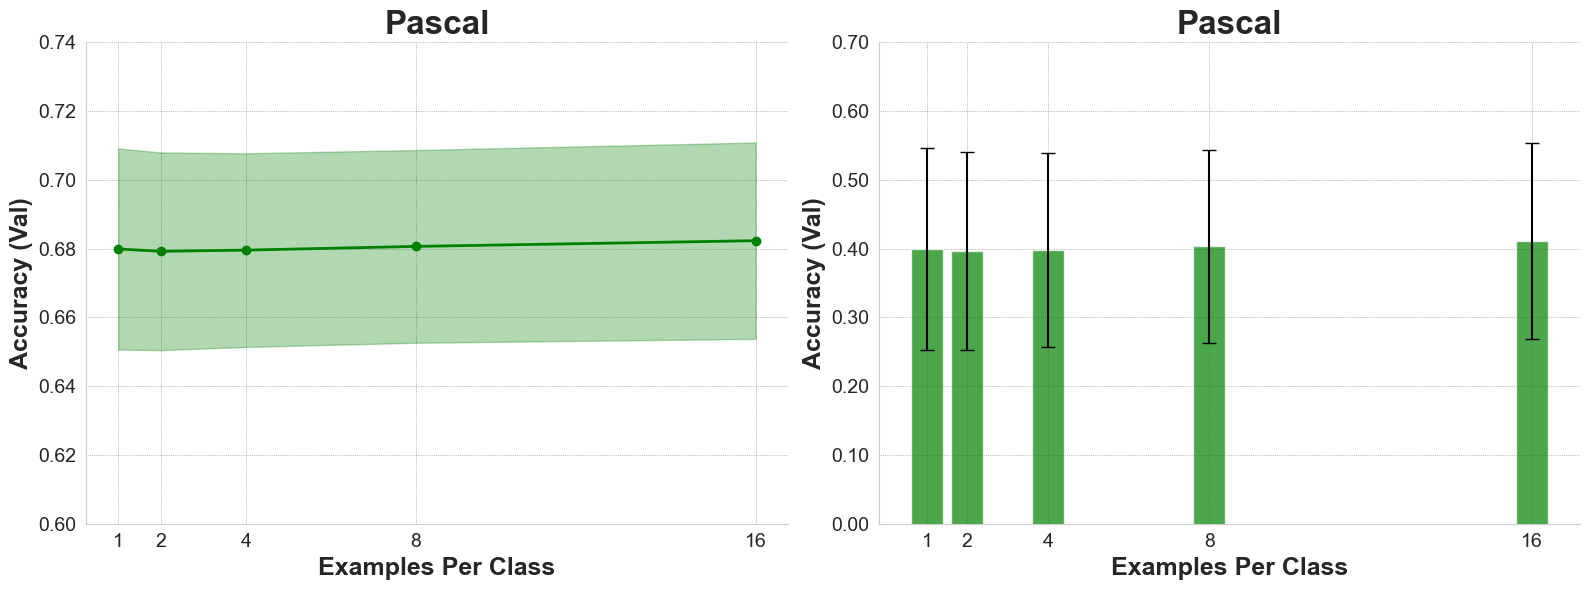

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np

def plot_pascal_results(csv_folder, output_filename='pascal_results_plot'):
    # Load all CSV files in the folder
    all_files = glob.glob(os.path.join(csv_folder, "*.csv"))
    
    # Read and concatenate all CSV files
    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        trial_num = int(filename.split('_')[-2])
        examples_per_class = int(filename.split('_')[-1].split('.')[0])
        df['trial'] = trial_num
        df['examples_per_class'] = examples_per_class
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Filter data
    filtered_df = combined_df[(combined_df['metric'] == 'Accuracy') & 
                              (combined_df['split'] == 'Validation')]
    
    # Calculate mean and std for each examples_per_class
    grouped = filtered_df.groupby('examples_per_class')
    mean_values = grouped['value'].mean()
    std_values = grouped['value'].std()
    
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    sns.set_style("whitegrid")
    
    # Create the line plot
    ax1.plot(mean_values.index, mean_values.values, color='green', marker='o', linewidth=2)
    ax1.fill_between(mean_values.index, mean_values.values - std_values.values, 
                     mean_values.values + std_values.values, alpha=0.3, color='green')
    
    # Create the bar plot
    ax2.bar(mean_values.index, mean_values.values, yerr=std_values.values, 
            capsize=5, color='green', alpha=0.7)
    
    # Customize both plots
    for ax in [ax1, ax2]:
        ax.set_title('Pascal', fontsize=24, fontweight='bold')
        ax.set_xlabel('Examples Per Class', fontsize=18, fontweight='bold')
        ax.set_ylabel('Accuracy (Val)', fontsize=18, fontweight='bold')
        ax.set_xticks([1, 2, 4, 8, 16])
        ax.set_xticklabels([1, 2, 4, 8, 16], fontsize=14)
        ax.set_yticklabels([f'{x:.2f}' for x in ax.get_yticks()], fontsize=14)
        ax.grid(color='grey', linestyle=':', linewidth=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # Adjust y-axis for better visualization
    y_min = min(mean_values.min() - std_values.max(), 0.5)
    y_max = max(mean_values.max() + std_values.max(), 0.85)
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)
    
    # Tight layout and save
    plt.tight_layout()
    plt.savefig(f'{output_filename}.png', dpi=300)
    plt.savefig(f'{output_filename}.pdf')
    plt.show()

# Usage
plot_pascal_results('/Users/andrew/Thesis/pascal-baselines/textual-inversion-1.0-0.75-0.5-0.25')